In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.io as sio
import numpy as np
import os
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from itertools import combinations

%matplotlib inline


In [2]:
def logistic(x, min_val, max_val, k=1):
    x0 = (min_val+max_val)/2
    return 1/(1 + np.exp(-k*(x-x0)))
#     return np.exp(x0+ k*x)/(1 + np.exp(x0+ k*x))

In [34]:
def heart_data():
    data = pd.read_csv('data/processed.cleveland.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'], header=None)
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data

def load_car():
    data = pd.read_csv('data/car.data', header=None)
    cat_columns = data.select_dtypes(['object']).columns
    for c in cat_columns:
        data[c] = data[c].astype('category')
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    
    cols = list(data.columns)
    
    data = data.groupby(cols[-1]).filter(lambda x: len(x) > 2)
    data[cols[-1]] -= min(data[cols[-1]])
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data

def wine_quality_white():
#     data = pd.read_csv('data/winequality-red.csv', sep=';')
    data = pd.read_csv('data/winequality-white.csv', sep=';')
    cols = list(data.columns)
    data[cols[-1]] -= min(data[cols[-1]])
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data

def wine_quality_red():
    data = pd.read_csv('data/winequality-red.csv', sep=';')
    cols = list(data.columns)
    data[cols[-1]] -= min(data[cols[-1]])
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data

def load_adult():
    data = pd.read_csv('data/adult.data', header=None)
    cat_columns = data.select_dtypes(['object']).columns
    for c in cat_columns:
        data[c] = data[c].astype('category')
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data

def load_abalone():
    data = pd.read_csv('data/abalone.data', header=None)
    cat_columns = data.select_dtypes(['object']).columns
    for c in cat_columns:
        data[c] = data[c].astype('category')
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    
    cols = list(data.columns)
    
    data = data.groupby(cols[-1]).filter(lambda x: len(x) > 2)
    data[cols[-1]] -= min(data[cols[-1]])
    invalidIndexes = []
    for row in data.itertuples():
        if '?' in row:
            invalidIndexes.append(row[0])
    new_data = data.drop(data.index[invalidIndexes])
    cols = list(new_data.columns)
    new_data[cols] = new_data[cols].astype('float32')
    return new_data
    

def load_mat(mat_file):
    data = sio.loadmat(mat_file)
    data = np.concatenate((data['X'], data['Y']-1), axis=1)
#     plt.scatter(data[:300,0], data[:300,1], c='c', marker='x')
#     plt.scatter(data[300:600,0], data[300:600,1], c='b', marker='x')
#     plt.scatter(data[900:1200,0], data[900:1200,1], c='g', marker='x')
#     plt.scatter(data[600:900,0], data[600:900,1], c='r', marker='x')
#     plt.scatter(data[1200:1500,0], data[1200:1500,1], c='y', marker='x')
#     plt.scatter(data[1500:1800,0], data[1500:1800,1], c='m', marker='x')
#     plt.scatter(data[1800:2100,0], data[1800:2100,1], c='k', marker='x')
#     plt.scatter(data[2100:2400,0], data[2100:2400,1], marker='x')
#     plt.show()
    data = pd.DataFrame(data=data)
    return data


In [4]:
#synthetic data
def synthetic_data(p, t, n_dim=2):
    #mean1 = np.concatenate((np.ones(1)*-10,np.ones(12)))
    #mean2 = np.concatenate((np.ones(12),np.ones(1)*10))
    
    q0 = p*t
    q1 = p*(t-q0)
    q2 = p*(t-q0-q1)
    q3 = p*(t-q0-q1-q2)
    q4 = t-q0-q1-q2-q3
    
    q = [np.int(q0), np.int(q1), np.int(q2), np.int(q3), np.int(q4)]
    
#     mean0 = np.ones(n_dim)*1
#     mean1 = np.ones(n_dim)*1.5
#     mean2 = np.ones(n_dim)*1.7
#     mean3 = np.ones(n_dim)*0.5
#     mean4 = np.ones(n_dim)*1.65
    
    
    mean0 = np.random.randint(1,3, size=n_dim)*np.random.rand(n_dim)
    mean1 = np.random.randint(1,3, size=n_dim)*np.random.rand(n_dim)
    mean2 = np.random.randint(1,3, size=n_dim)*np.random.rand(n_dim)
    mean3 = np.random.randint(1,3, size=n_dim)*np.random.rand(n_dim)
    mean4 = np.random.randint(1,3, size=n_dim)*np.random.rand(n_dim)
    
    
#     np.random.seed(1234)
    
    var0 = np.diag(np.random.randint(1,10, size=n_dim)*np.random.rand(n_dim))
    var1 = np.diag(np.random.randint(1,10, size=n_dim)*np.random.rand(n_dim))
    var2 = np.diag(np.random.randint(1,10, size=n_dim)*np.random.rand(n_dim))
    var3 = np.diag(np.random.randint(1,10, size=n_dim)*np.random.rand(n_dim))
    var4 = np.diag(np.random.randint(1,10, size=n_dim)*np.random.rand(n_dim))
    
    #g0 = np.random.multivariate_normal(mean0, np.eye(13), size=q[0])
    #g1 = np.random.multivariate_normal(mean1, np.eye(13), size=q[1])
    #g2 = np.random.multivariate_normal(mean2, np.eye(13), size=q[2])
    #g3 = np.random.multivariate_normal(mean3, np.eye(13), size=q[3])
    #g4 = np.random.multivariate_normal(mean4, np.eye(13), size=q[4])
    
    g0 = np.random.multivariate_normal(mean0, var0, size=q[0])
    g1 = np.random.multivariate_normal(mean1, var1, size=q[1])
    g2 = np.random.multivariate_normal(mean2, var2, size=q[2])
    g3 = np.random.multivariate_normal(mean3, var3, size=q[3])
    g4 = np.random.multivariate_normal(mean4, var4, size=q[4])

    
    y0 = np.asarray([0]*q[0]).reshape(q[0],1)
    y1 = np.asarray([1]*q[1]).reshape(q[1],1)
    y2 = np.asarray([2]*q[2]).reshape(q[2],1)
    y3 = np.asarray([3]*q[3]).reshape(q[3],1)
    y4 = np.asarray([4]*q[4]).reshape(q[4],1)


    #y1 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y2 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y3 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y4 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    
    g0 = np.concatenate((g0,y0), axis=1)
    g1 = np.concatenate((g1,y1), axis=1)
    g2 = np.concatenate((g2,y2), axis=1)
    g3 = np.concatenate((g3,y3), axis=1)
    g4 = np.concatenate((g4,y4), axis=1)

    g = np.concatenate([g0,g1,g2,g3,g4], axis=0)
    d = pd.DataFrame(data=g)

#     d = pd.DataFrame(data=g, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
    if n_dim == 2:
        plt.scatter(g0[:,0], g0[:,1], c='c')
        plt.scatter(g1[:,0], g1[:,1], c='b')
        plt.scatter(g2[:,0], g2[:,1], c='r')
        plt.scatter(g3[:,0], g3[:,1], c='g')
        plt.scatter(g4[:,0], g4[:,1], c='y')
        plt.show()
    elif n_dim == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(g0[:,0], g0[:,1], g0[:,2], c='c')
        ax.scatter(g1[:,0], g1[:,1], g1[:,2], c='b')
        ax.scatter(g2[:,0], g2[:,1], g2[:,2], c='r')
        ax.scatter(g3[:,0], g3[:,1], g3[:,2], c='g')
        ax.scatter(g4[:,0], g4[:,1], g4[:,2], c='y')
        plt.show()
    
    return d

#d1 = pd.DataFrame(data=g1, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d2 = pd.DataFrame(data=g2, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d3 = pd.DataFrame(data=g3, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d4 = pd.DataFrame(data=g4, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])


In [5]:
#optimal cutpoints

#find the closest point to (0,1) coordinate
def roc01(fpr, tpr):
    tl = [0,1]
    index = None
    opt = np.inf
    for i in range(len(fpr)):
        d = np.linalg.norm(np.array(tl) - np.array([fpr[i], tpr[i]]))
        if d < opt:
            opt = d
            index = i
    return fpr[index], tpr[index]

#Youden's index
def youden_index(fpr, tpr):
    sp = 1-fpr
    se = tpr
    index = None
    opt = -1
    for i in range(len(fpr)):
        pt = sp[i]+se[i]-1
        if pt > opt:
            opt = pt
            index = i
            
    return fpr[index], tpr[index]
    
#maximize sensitivity
def max_se(fpr, tpr, threshold=1e-4):
    sp = 1-fpr
    se = tpr
    index = None
    opt_se = -1
    opt_sp = -1
    for i in range(len(fpr)):
        if se[i] > opt_se:
            opt_se = se[i]
            opt_sp = sp[i]
            index = i
        elif abs(se[i]-opt_se) <= threshold:
            if sp[i] > opt_sp:
                opt_se = se[i]
                opt_sp = sp[i]
                index = i
    return fpr[index], tpr[index]

#maximize specificity
def max_sp(fpr, tpr, threshold=1e-4):
    sp = 1-fpr
    se = tpr
    index = None
    opt_se = -1
    opt_sp = -1
    for i in range(len(fpr)):
        if np.isclose(fpr[i],0.0):
            continue
        if sp[i] > opt_sp:
            opt_se = se[i]
            opt_sp = sp[i]
            index = i
        elif abs(sp[i]-opt_sp) <= threshold:
            if se[i] > opt_se:
                opt_se = se[i]
                opt_sp = sp[i]
                index = i
    return fpr[index], tpr[index]
                
## https://en.wikipedia.org/wiki/Diagnostic_odds_ratio
def max_dor(fpr, tpr):
    sp = 1-fpr
    se = tpr
    index = None
    opt_dor = -1
    for i in range(len(fpr)):
        dor = (se[i]/(1.0-se[i]))*(sp[i]/(1.0-sp[i]))
        if dor > opt_dor and not np.isinf(dor) and not np.isnan(dor):
            opt_dor = dor
            index = i
    return fpr[index], tpr[index]


In [135]:
class ClassifierWithRoc(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n_classes = len(np.unique(Y))
        self.n_clf = self.n_classes * (self.n_classes - 1) // 2
        self.c_groups = [(t[1],t[0]) for t in list(combinations(list(range(0,self.n_classes)),2))]
    
    def split_data(self, X, Y, min_samples=500):
        if X.shape[0] >= min_samples:
            x_train, x_test_and_val, y_train, y_test_and_val = train_test_split(X, Y, test_size=.40, stratify=Y)
            x_val, x_test, y_val, y_test = train_test_split(x_test_and_val, y_test_and_val, 
                                                            test_size=.50, stratify=y_test_and_val)
        else:
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, stratify=Y)
            x_val = None; y_val = None
            
        return x_train, x_val, x_test, y_train, y_val, y_test
    
    def z_score(self, x_train):      
        scaler = preprocessing.StandardScaler().fit(x_train)
        return scaler
    
    def estimator(self, x_train, y_train, scaler):
        x_train = scaler.transform(x_train)
        ovo = OneVsOneClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), n_jobs=-1)
        ovo.fit(x_train, y_train)
        return ovo
    
    def predict(self, estimator, x_test, y_test, scaler, points=None, c=0, mode='half', clfs=None):
        modes = {'zero': 0, 'half': 0.5, 'one':1}
        x_test = scaler.transform(x_test)
        if points is None:
            y_test_bin = label_binarize(y_test, classes=list(range(self.n_classes)))
            votes = np.zeros(y_test_bin.shape)
#             pred = estimator.predict(x_test)
            if clfs is None:
                for i in range(self.n_clf):
                    clf = estimator.estimators_[i]
                    proba = clf.decision_function(x_test)
                    for j, p in enumerate(proba):
                        if p > 0:
                            votes[j, self.c_groups[i][0]] += 1
                        else:
                            votes[j, self.c_groups[i][1]] += 1
            else:
                for i in clfs:
                    clf = estimator.estimators_[i]
                    proba = clf.decision_function(x_test)
                    for j, p in enumerate(proba):
                        if p > 0:
                            votes[j, self.c_groups[i][0]] += 1
                        else:
                            votes[j, self.c_groups[i][1]] += 1
#             cm = confusion_matrix(y_test, pred)
#             acc = cm.diagonal().sum() / cm.sum()
#             return [pred, cm, acc]
        elif c < 2:
            y_test_bin = label_binarize(y_test, classes=list(range(self.n_classes)))
            votes = np.zeros(y_test_bin.shape)
            if clfs is None:
                for i in range(self.n_clf):
                    clf = estimator.estimators_[i]
                    proba = clf.decision_function(x_test)
                    for j, p in enumerate(proba):
                        if p > points[i][c] or np.isclose(p,points[i][c]):
                            votes[j, self.c_groups[i][0]] += 1
                        else:
                            votes[j, self.c_groups[i][1]] += 1
            else:
                for i in clfs:
                    clf = estimator.estimators_[i]
                    proba = clf.decision_function(x_test)
                    for j, p in enumerate(proba):
                        if p > points[i][c] or np.isclose(p,points[i][c]):
                            votes[j, self.c_groups[i][0]] += 1
                        else:
                            votes[j, self.c_groups[i][1]] += 1
        elif c == 2:
            if mode != 'logistic':
                y_test_bin = label_binarize(y_test, classes=list(range(self.n_classes)))
                votes = np.zeros(y_test_bin.shape)
                if clfs is None:
                    for i in range(self.n_clf):
                        clf = estimator.estimators_[i]
                        proba = clf.decision_function(x_test)
                        for j, p in enumerate(proba):
                            if p > points[i].max() or np.isclose(p, points[i].max()):
                                votes[j, self.c_groups[i][0]] += 1
                            elif p > points[i].min() and p < points[i].max():
                                votes[j, self.c_groups[i][0]] += modes[mode]
                                votes[j, self.c_groups[i][1]] += modes[mode]
                            elif p < points[i].min():
                                votes[j, self.c_groups[i][1]] += 1
                else:
                    for i in clfs:
                        clf = estimator.estimators_[i]
                        proba = clf.decision_function(x_test)
                        for j, p in enumerate(proba):
                            if p > points[i].max() or np.isclose(p, points[i].max()):
                                votes[j, self.c_groups[i][0]] += 1
                            elif p > points[i].min() and p < points[i].max():
                                votes[j, self.c_groups[i][0]] += modes[mode]
                                votes[j, self.c_groups[i][1]] += modes[mode]
                            elif p < points[i].min():
                                votes[j, self.c_groups[i][1]] += 1
            else:
                y_test_bin = label_binarize(y_test, classes=list(range(self.n_classes)))
                votes = np.zeros(y_test_bin.shape)
                if clfs is None:
                    for i in range(self.n_clf):
                        clf = estimator.estimators_[i]
                        proba = clf.decision_function(x_test)
                        for j, p in enumerate(proba):
                            if p > points[i].max() or np.isclose(p, points[i].max()):
                                votes[j, self.c_groups[i][0]] += 1
                            elif p > points[i].min() and p < points[i].max():
                                #adjust steepness to interval
                                #12 seeems to be a good number
                                k = 12 / (abs(max(points[i]) - min(points[i])))
                                point = logistic(p, min(points[i]), max(points[i]), k=k)
                                votes[j, self.c_groups[i][0]] += point
                                votes[j, self.c_groups[i][1]] += 1-point
                            elif p < points[i].min():
                                votes[j, self.c_groups[i][1]] += 1
                else:
                    for i in clfs:
                        clf = estimator.estimators_[i]
                        proba = clf.decision_function(x_test)
                        for j, p in enumerate(proba):
                            if p > points[i].max() or np.isclose(p, points[i].max()):
                                votes[j, self.c_groups[i][0]] += 1
                            elif p > points[i].min() and p < points[i].max():
                                #adjust steepness to interval
                                #12 seeems to be a good number
                                k = 12 / (abs(max(points[i]) - min(points[i])))
                                point = logistic(p, min(points[i]), max(points[i]), k=k)
                                votes[j, self.c_groups[i][0]] += point
                                votes[j, self.c_groups[i][1]] += 1-point
                            elif p < points[i].min():
                                votes[j, self.c_groups[i][1]] += 1
        
        print(votes)
        occurrences = np.asarray([np.where(t==t.max())[0] for t in votes])
        print(occurrences)
        pred = [p[-1] for p in occurrences]
        cm = confusion_matrix(y_test, pred)
        acc = cm.diagonal().sum() / cm.sum()
        return [pred, cm, acc]
        
        
    def calculate_roc(self, estimator, x_val, x_train, y_val, y_train, scaler):
        clf_index = 0
        fpr = dict(); tpr = dict(); thresholds = dict(); roc_auc = dict(); cutpoints = dict()
        x_val = scaler.transform(x_val) if x_val is not None else None
        x_train = scaler.transform(x_train)
        y_val_bin = label_binarize(y_val, classes=list(range(self.n_classes))) if y_val is not None else None
        y_train_bin = label_binarize(y_train, classes=list(range(self.n_classes)))
        for i in range(self.n_classes):
            for j in range(self.n_classes):
                if j > i:
                    clf = estimator.estimators_[clf_index]
                    if y_val_bin is not None and x_val is not None:
                        proba = clf.decision_function(x_val)
                        fpr[clf_index], tpr[clf_index], thresholds[clf_index] = roc_curve(abs(y_val_bin[:, i]-1),
                                                                                          proba)
                    else:
                        proba = clf.decision_function(x_train)
                        fpr[clf_index], tpr[clf_index], thresholds[clf_index] = roc_curve(abs(y_train_bin[:, i]-1),
                                                                                          proba)
                    roc_auc[clf_index] = auc(fpr[clf_index], tpr[clf_index])
                    youden_cut = youden_index(fpr[clf_index], tpr[clf_index])
                    maxdor_cut = max_dor(fpr[clf_index], tpr[clf_index])
                    y_index = np.where(np.isclose(fpr[clf_index],youden_cut[0]))[0][0]
                    d_index = np.where(np.isclose(fpr[clf_index],maxdor_cut[0]))[0][0]
                    if y_index == 0:
                        y_index += 1
                    if d_index == 0:
                        d_index += 1

                    cutpoints[clf_index] = np.array([thresholds[clf_index][y_index], thresholds[clf_index][d_index]])
                    clf_index += 1
        return fpr, tpr, thresholds, roc_auc, cutpoints
    
    def plot_roc(self, fpr, tpr, thresholds, roc_auc, cutpoints, show=True, save=False, clfs=None):
        range_clf = list(range(self.n_clf)) if clfs is None else clfs
        for i in range_clf:
            youden_cut = youden_index(fpr[i], tpr[i])
            maxdor_cut = max_dor(fpr[i], tpr[i])
            default = np.where(np.isclose(thresholds[i],min(thresholds[i], key=abs)))[0][0]
            fig, ax = plt.subplots(1,2, figsize=(15,7))
            lw = 2
            ax[0].plot(fpr[i], tpr[i], color='darkorange',
                     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i], zorder=-1)
            ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', zorder=-1)
            ax[0].set_xlim([-0.05, 1.05])
            ax[0].set_ylim([-0.05, 1.05])
            ax[0].set_xlabel('False Positive Rate')
            ax[0].set_ylabel('True Positive Rate')
            ax[0].set_title('Receiver operating characteristic for class ' + str(tuple(reversed(self.c_groups[i]))))
            #ax.scatter(opt_cutpoint1[0], opt_cutpoint1[1], c='g', zorder=1, label='MaxSp cutpoint', s=50)
            #ax.scatter(opt_cutpoint2[0], opt_cutpoint2[1], c='r', zorder=1, label='MaxSe cutpoint', s=50)
            ax[0].scatter(youden_cut[0], youden_cut[1], c='b', zorder=1, label='Youden', s=50)
            ax[0].scatter(maxdor_cut[0], maxdor_cut[1], c='r', zorder=1, label='Max Dor', s=50)
            ax[0].scatter(fpr[i][default], tpr[i][default], c='g', zorder=1, label='Default', s=50)
            ax[0].legend(loc="lower right")

            ax2 = ax[0].twinx()
            ax2.plot(fpr[i], thresholds[i], color='r', lw=lw, linestyle='--', zorder=-1)
            ax2.set_ylabel('Threshold',color='r')
            ax2.set_ylim([thresholds[i][-1],thresholds[i][0]])
            ax2.set_xlim([-0.05, 1.05])

            if np.isclose(min(cutpoints[i]), max(cutpoints[i])):  
                ax[1].axis('off')
            else:
                #adjust steepness to interval
                #12 seeems to be a good number
                k = 12 / (abs(max(cutpoints[i]) - min(cutpoints[i])))

                x_range = np.arange(min(cutpoints[i]), max(cutpoints[i]), 0.0001)
                y_range = logistic(x_range, min(cutpoints[i]), max(cutpoints[i]), k=k)
                ax[1].set_title('Logistic function between cutpoints')

                ax[1].spines['left'].set_position('center')
                ax[1].spines['right'].set_color('none')
                ax[1].spines['top'].set_color('none')
                ax[1].xaxis.set_ticks_position('bottom')
                ax[1].yaxis.set_ticks_position('left')
                ax[1].plot(x_range, y_range, c='y', lw=lw, zorder=-1)
                ax[1].scatter(cutpoints[i][0], logistic(cutpoints[i][0], min(cutpoints[i]), max(cutpoints[i]), k=k), 
                              c='b', zorder=1, label='Youden', s=50)
                ax[1].scatter(cutpoints[i][1], logistic(cutpoints[i][1], min(cutpoints[i]), max(cutpoints[i]), k=k),
                              c='r', zorder=1, label='Max Dor', s=50)

                ax[1].plot([x_range[0], x_range[0]], [-0.05, y_range[0]], linestyle='--', c='k')
                ax[1].plot([x_range[-1], x_range[-1]], [-0.05, y_range[-1]], linestyle='--', c='k')
                ax[1].set_xticks(cutpoints[i], minor=False)

            
            fig.subplots_adjust(hspace=0.3, wspace=0.6, top=0.8)
            if save:
                plots_folder = os.path.join(os.getcwd(),'roc_plots')
                if not os.path.exists(plots_folder):
                    os.mkdir(plots_folder)
                plt.savefig(os.path.join(os.getcwd(), 'heart_' + str(tuple(reversed(self.c_groups[i])))) + '.png',
                            bbox_inches='tight', pad_inches=0.5)
            if show:
                plt.show()
        
        
        

In [7]:
def apply(data, times=1, clfs=None):
    cols = list(data.columns)
    Y = data[cols[-1]].copy()
    cols.remove(cols[-1])
    X = data[cols].copy()
    roc_clf = ClassifierWithRoc(X,Y)
    
    pred = []; pred_y = []; pred_dor = []; pred_zero = []; pred_half = []; pred_one = []; pred_log = []
    
    for i in tqdm(range(times)):
        x_train, x_val, x_test, y_train, y_val, y_test = roc_clf.split_data(X, Y)
        scaler = roc_clf.z_score(x_train)
        est = roc_clf.estimator(x_train, y_train, scaler)
        fpr, tpr, thresholds, roc_auc, cutpoints = roc_clf.calculate_roc(est, x_val, x_train, y_val, 
                                                                         y_train, scaler)
        pred.append(roc_clf.predict(est, x_test, y_test, scaler, clfs=clfs))
        pred_y.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=0, clfs=clfs))
        pred_dor.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=1, clfs=clfs))
        pred_zero.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=2, mode='zero', clfs=clfs))
        pred_half.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=2, mode='half', clfs=clfs))
        pred_one.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=2, mode='one', clfs=clfs))
        pred_log.append(roc_clf.predict(est, x_test, y_test, scaler, cutpoints, c=2, mode='logistic', clfs=clfs))
#         roc_clf.plot_roc(fpr, tpr, thresholds, roc_auc, cutpoints)
    
    pred = np.asarray(pred); pred_y = np.asarray(pred_y); pred_dor = np.asarray(pred_dor); 
    pred_zero = np.asarray(pred_zero); pred_half = np.asarray(pred_half); pred_one = np.asarray(pred_one); 
    pred_log = np.asarray(pred_log)
    
    return np.array([[np.mean(pred[:,2]), np.std(pred[:,2])], [np.mean(pred_y[:,2]), np.std(pred_y[:,2])], [np.mean(pred_dor[:,2]), np.std(pred_dor[:,2])],
            [np.mean(pred_zero[:,2]), np.std(pred_zero[:,2])], [np.mean(pred_half[:,2]), np.std(pred_half[:,2])], 
            [np.mean(pred_one[:,2]), np.std(pred_one[:,2])], [np.mean(pred_log[:,2]), np.std(pred_log[:,2])]])

#     print(np.mean(pred[:,2]))
#     print(np.mean(pred_y[:,2]))
#     print(np.mean(pred_dor[:,2]))
#     print(np.mean(pred_zero[:,2]))
#     print(np.mean(pred_half[:,2]))
#     print(np.mean(pred_one[:,2]))
#     print(np.mean(pred_log[:,2]))

[[4.8311072629499279, 5], [5.1049929477267098, 1], [5.4723863440495126, 4], [6.1933192348343171, 0]]
[ 5.  1.  4.  0.]
[(1, 0), (4, 0), (5, 0), (4, 1), (5, 1), (5, 4)] 6


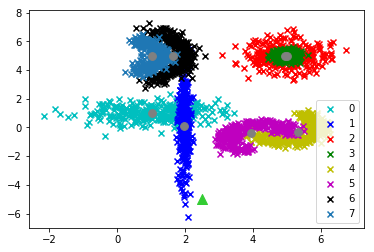

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars


[[ 0.  3.  0.  0.  1.  2.  0.  0.]]
[[1]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[[ 0.  1.  0.  0.  3.  2.  0.  0.]]
[[4]]
[1] [4] [4] [4] [4] [4] [4]


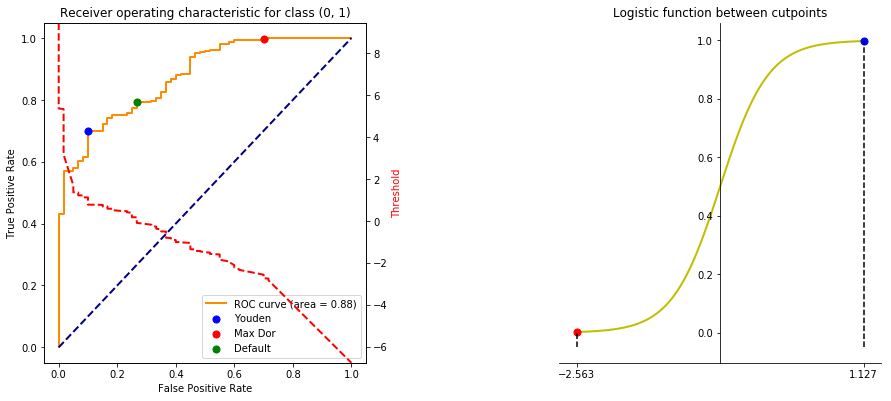

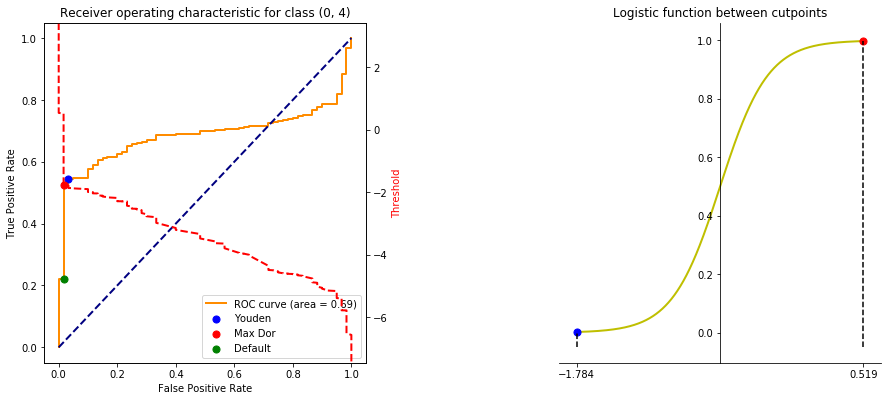

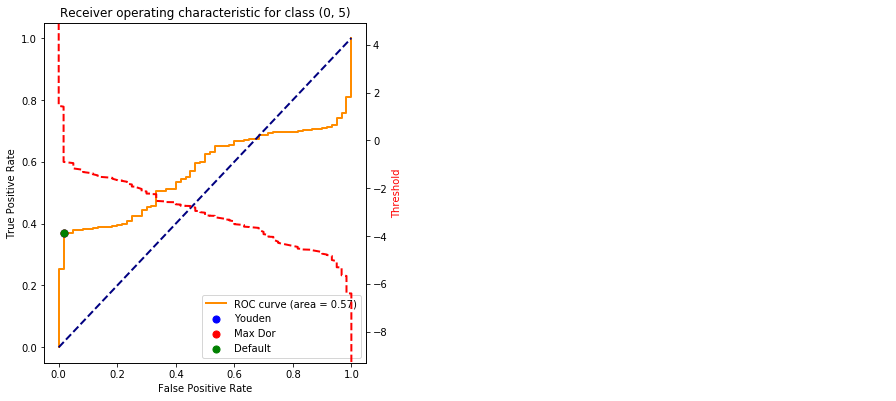

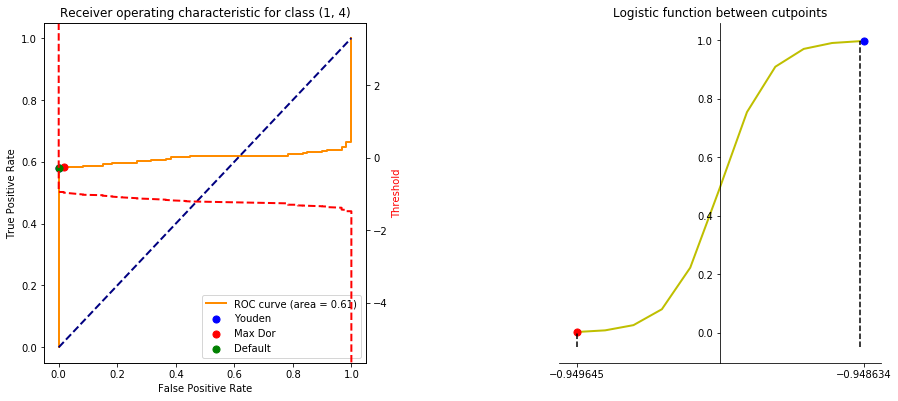

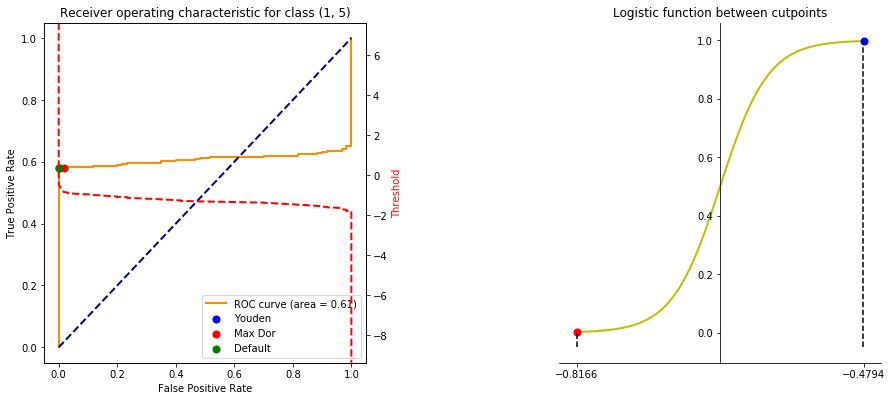

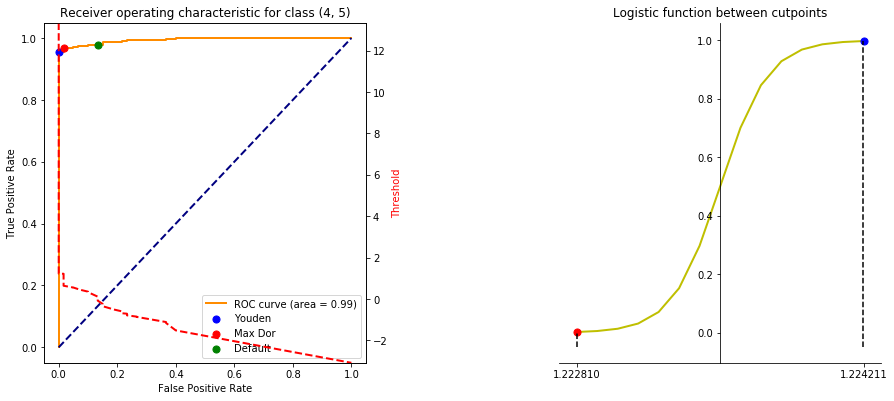

In [136]:
data = load_mat('data/synth8.mat')
c1, c2, c3, c4, c5 = data[:300], data[300:600], data[600:900], data[900:1200], data[1200:1500], 
c6, c7, c8 = data[1500:1800], data[1800:2100], data[2100:2400]

centroid1, centroid2, centroid3, centroid4 = np.mean(c1, axis=0)[:2], np.mean(c2, axis=0)[:2], np.mean(c3, axis=0)[:2], np.mean(c4, axis=0)[:2]
centroid5, centroid6, centroid7, centroid8 = np.mean(c5, axis=0)[:2], np.mean(c6, axis=0)[:2], np.mean(c7, axis=0)[:2], np.mean(c8, axis=0)[:2]

plt.clf()
plt.cla()
plt.close()
plt.scatter(c1[0], c1[1], c='c', marker='x', label='0')
plt.scatter(c2[0], c2[1], c='b', marker='x', label='1')
plt.scatter(c4[0], c4[1], c='r', marker='x', label='2')
plt.scatter(c3[0], c3[1], c='g', marker='x', label='3')
plt.scatter(c5[0], c5[1], c='y', marker='x', label='4')
plt.scatter(c6[0], c6[1], c='m', marker='x', label='5')
plt.scatter(c7[0], c7[1], c='k', marker='x', label='6')
plt.scatter(c8[0], c8[1], marker='x', label='7')
plt.legend(loc="lower right")

#centroids
plt.scatter(centroid1[0], centroid1[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid2[0], centroid2[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid4[0], centroid4[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid3[0], centroid3[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid5[0], centroid5[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid6[0], centroid6[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid7[0], centroid7[1], c=(0.5,0.5,0.5), marker='o', s=60)
plt.scatter(centroid8[0], centroid8[1], c=(0.5,0.5,0.5), marker='o', s=60)


#test point
# p = np.array([[-1, 6]])
# p = np.array([[2, 0.5]])
# p = np.array([[3.5, 5.8]])
p = np.array([[2.5, -5]])
p_class = 1

d1, d2, d3 = np.linalg.norm(p[0]-centroid1), np.linalg.norm(p[0]-centroid2), np.linalg.norm(p[0]-centroid3)
d4, d5, d6 = np.linalg.norm(p[0]-centroid4), np.linalg.norm(p[0]-centroid5), np.linalg.norm(p[0]-centroid6)
d7, d8 = np.linalg.norm(p[0]-centroid7), np.linalg.norm(p[0]-centroid8)

dists = [[d1,0],[d2,1],[d3,2],[d4,3],[d5,4],[d6,5],[d7,6],[d8,7]]
dists.sort()
print(dists[:int(len(dists)/2)])
chosen = np.asarray(dists[:int(len(dists)/2)])[:,1]
print(chosen)


plt.scatter(p[0,0], p[0,1], c=(0.2,0.8,0.2), marker='^', s=100)

cols = list(data.columns)
Y = data[cols[-1]].copy()
cols.remove(cols[-1])
X = data[cols].copy()
roc_clf = ClassifierWithRoc(X,Y)
# print(roc_clf.c_groups, len(roc_clf.c_groups))
pairs = [pair for pair in roc_clf.c_groups if pair[0] in chosen and pair[1] in chosen]
clfs = [roc_clf.c_groups.index(clf) for clf in pairs]
print(pairs, len(pairs))
# print(clfs)

plt.show()

x_train, x_val, x_test, y_train, y_val, y_test = roc_clf.split_data(X, Y)
scaler = roc_clf.z_score(x_train)
est = roc_clf.estimator(x_train, y_train, scaler)
fpr, tpr, thresholds, roc_auc, cutpoints = roc_clf.calculate_roc(est, x_val, x_train, y_val, 
                                                                 y_train, scaler)

pred = roc_clf.predict(est, p, np.array([p_class]), scaler, clfs=clfs)
pred_y = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=0, clfs=clfs)
pred_dor = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=1, clfs=clfs)
pred_zero = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=2, mode='zero', clfs=clfs)
pred_half = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=2, mode='half', clfs=clfs)
pred_one = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=2, mode='one', clfs=clfs)
pred_log = roc_clf.predict(est, p, np.array([p_class]), scaler, cutpoints, c=2, mode='logistic', clfs=clfs)


print(pred[0], pred_y[0], pred_dor[0], pred_zero[0], pred_half[0], pred_one[0], pred_log[0])
    
roc_clf.plot_roc(fpr, tpr, thresholds, roc_auc, cutpoints, clfs=clfs)
# out = apply(data)

In [8]:
datasets = [heart_data(), load_car(), wine_quality_red(), wine_quality_white(), load_abalone(), 
            load_mat('data/synth8.mat'), load_mat('data/synth8_unbalanced.mat')]

cols = ['dataset', 'mean acc', 'std', 'mean acc yoden', 'std yoden', 'mean acc max dor', 'std max dor',
        'mean acc both zero', 'std both zero', 'mean acc both half', 'std both half',
        'mean acc both one', 'std both one', 'mean acc both logistic', 'std both logistic']
names = [['heart'], ['car'], ['red wine quality'], ['white wine quality'], ['abalone'], ['synth8'],
         ['unbalanced synth8']]

d_rows = []

times = 10
for d in datasets:
    d_rows.append(apply(d, times).ravel())
d_rows = np.asarray(d_rows)
d_rows = np.concatenate((names, d_rows), axis=1)
df = pd.DataFrame(data=np.asarray(d_rows), columns=cols)
df
# data = heart_data()
# data = load_adult()
# data = wine_quality_red()
# data = wine_quality_white()
# data = load_abalone()
# data = load_mat('data/synth8.mat')
# data = load_mat('data/synth8_unbalanced.mat')

# data = heart_data()
# apply(data).ravel()

  0%|          | 0/10 [00:00<?, ?it/s]/home/gmatos/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/home/gmatos/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


,dataset,mean acc,std,mean acc yoden,std yoden,mean acc max dor,std max dor,mean acc both zero,std both zero,mean acc both half,std both half,mean acc both one,std both one,mean acc both logistic,std both logistic
0,heart,0.495,0.07151145984308312,0.48500000000000004,0.07243771270700244,0.43,0.08491826135237998,0.4466666666666666,0.07408703590297624,0.4883333333333334,0.06710274046399134,0.4566666666666667,0.07118052168020873,0.49833333333333335,0.06808899405271833
1,car,0.5138728323699422,0.021269791321357343,0.49479768786127176,0.04319431605148997,0.43641618497109824,0.09695659531936453,0.47485549132947974,0.07022645622458923,0.4765895953757225,0.06370784015375477,0.4586705202312139,0.06483336046838421,0.4791907514450867,0.06080089614938592
2,red wine quality,0.43125,0.018750000000000006,0.12000000000000002,0.07236517636266769,0.373125,0.06806763639939321,0.3784374999999999,0.09614086751350852,0.37031249999999993,0.11571997788303451,0.34531249999999997,0.1111046276320208,0.24718750000000003,0.07269169162462792
3,white wine quality,0.32010204081632654,0.02753230656954784,0.23836734693877554,0.0668973864078778,0.3248979591836735,0.06989341561279211,0.3510204081632653,0.12092159644357982,0.35959183673469386,0.09813462181276303,0.34989795918367345,0.08600467089201404,0.3018367346938775,0.10003622833966114
4,abalone,0.22649880095923264,0.00946331104190678,0.1804556354916067,0.01645134620385161,0.11235011990407676,0.028732229395647076,0.1922062350119904,0.018089627281554187,0.18441247002398084,0.02047377471318129,0.16330935251798562,0.021561406995672924,0.14112709832134293,0.02174896019669739
5,synth8,0.7729166666666667,0.014523687548277828,0.6879166666666667,0.015750881809529837,0.6585416666666667,0.032933144609783145,0.6785416666666667,0.039020672049853544,0.6925,0.02987531961707226,0.6733333333333335,0.020086617988656585,0.7235416666666666,0.027196079425371406
6,unbalanced synth8,0.8706250000000001,0.015194057226429036,0.8117187500000002,0.024973130091410233,0.78515625,0.04916415623004731,0.81609375,0.020694131301228866,0.8198437500000001,0.028692622772456693,0.82109375,0.030906313195081987,0.8345312500000001,0.04013800655628653


In [10]:
datasets = [heart_data(), load_car(), wine_quality_red(), wine_quality_white(), load_abalone(), 
            load_mat('data/synth8.mat'), load_mat('data/synth8_unbalanced.mat')]

cols = ['dataset', 'mean acc', 'std', 'mean acc yoden', 'std yoden', 'mean acc max dor', 'std max dor',
        'mean acc both zero', 'std both zero', 'mean acc both half', 'std both half',
        'mean acc both one', 'std both one', 'mean acc both logistic', 'std both logistic']
names = [['heart'], ['car'], ['red wine quality'], ['white wine quality'], ['abalone'], ['synth8'],
         ['unbalanced synth8']]

d_rows = []

times = 10
for d in datasets:
    d_rows.append(apply(d, times).ravel())
d_rows = np.asarray(d_rows)
d_rows = np.concatenate((names, d_rows), axis=1)
df = pd.DataFrame(data=np.asarray(d_rows), columns=cols)
df

  0%|          | 0/10 [00:00<?, ?it/s]/home/gmatos/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/home/gmatos/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


,dataset,mean acc,std,mean acc yoden,std yoden,mean acc max dor,std max dor,mean acc both zero,std both zero,mean acc both half,std both half,mean acc both one,std both one,mean acc both logistic,std both logistic
0,heart,0.525,0.044876373392787536,0.5,0.04533823502911815,0.4366666666666667,0.13055437351710758,0.43,0.10796089827134432,0.45999999999999996,0.09666666666666666,0.43,0.11542193128787191,0.5466666666666666,0.050990195135927854
1,car,0.5242774566473989,0.01896094736052801,0.47572254335260117,0.04044590909719285,0.39768786127167627,0.11719430444844665,0.4505780346820808,0.06544121056205783,0.4436416184971098,0.05986567096362619,0.427456647398844,0.06458034119174333,0.44450867052023124,0.05618842017054451
2,red wine quality,0.4328125,0.016901021603737448,0.108125,0.05957531997396238,0.4065625,0.045338354692798455,0.39656250000000004,0.0839857921392065,0.4078125,0.10748591840911068,0.37531250000000005,0.12757082897845418,0.2671875,0.10152403117612106
3,white wine quality,0.333265306122449,0.01622545241657221,0.22418367346938775,0.0632686799627054,0.2942857142857143,0.057097649756040515,0.305204081632653,0.061141866017415815,0.29969387755102045,0.06582708344305488,0.29387755102040813,0.05748802457552357,0.24826530612244904,0.0698410314879462
4,abalone,0.2252997601918465,0.011729168534972658,0.18273381294964028,0.0202932115089113,0.09136690647482015,0.014800262948881987,0.19352517985611511,0.01939483189025971,0.18956834532374098,0.01837664447530738,0.1695443645083933,0.017076967437294893,0.13501199040767387,0.016873703292328332
5,synth8,0.77375,0.013149778198382929,0.6864583333333333,0.0375028934068945,0.6389583333333333,0.03536822667781543,0.67,0.026173831290899018,0.6954166666666668,0.029386079470842423,0.6702083333333333,0.030434498197860208,0.6979166666666667,0.04327118941435899
6,unbalanced synth8,0.840625,0.08349658488525144,0.8246874999999999,0.027606328531697227,0.8109375,0.04207740263490606,0.8284374999999999,0.024494897427831792,0.8403124999999999,0.029858062667393548,0.8426562499999999,0.030888929676544313,0.84828125,0.03631896725971843


In [21]:
pd.set_option('precision', 2)
cat_columns = df.select_dtypes(['object']).columns
for c in cat_columns:
    try:
        df[c] = df[c].astype('float64')
    except ValueError:
        pass

In [22]:
df

,dataset,mean acc,std,mean acc yoden,std yoden,mean acc max dor,std max dor,mean acc both zero,std both zero,mean acc both half,std both half,mean acc both one,std both one,mean acc both logistic,std both logistic
0,heart,0.53,0.04,0.50,0.05,0.44,0.13,0.43,0.11,0.46,0.10,0.43,0.12,0.55,0.05
1,car,0.52,0.02,0.48,0.04,0.40,0.12,0.45,0.07,0.44,0.06,0.43,0.06,0.44,0.06
2,red wine quality,0.43,0.02,0.11,0.06,0.41,0.05,0.40,0.08,0.41,0.11,0.38,0.13,0.27,0.10
3,white wine quality,0.33,0.02,0.22,0.06,0.29,0.06,0.31,0.06,0.30,0.07,0.29,0.06,0.25,0.07
4,abalone,0.23,0.01,0.18,0.02,0.09,0.01,0.19,0.02,0.19,0.02,0.17,0.02,0.14,0.02
5,synth8,0.77,0.01,0.69,0.04,0.64,0.04,0.67,0.03,0.70,0.03,0.67,0.03,0.70,0.04
6,unbalanced synth8,0.84,0.08,0.82,0.03,0.81,0.04,0.83,0.02,0.84,0.03,0.84,0.03,0.85,0.04
